In [1]:
# Importing required libraries

import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Obtaining the dataset

data = pd.read_csv(r'E:\ESE 588 Pattern Recognition\data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# Slicing the dataset

data1 = data.loc[0:499, ['Age', 'Overall']]
data1.head()

,Age,Overall
0,31,94
1,33,94
2,26,92
3,27,91
4,27,91


In [4]:
# Adding the Yes/No column. 1 indicates a score greater than 85. 0 indicates a score of less than 85.

df = pd.DataFrame(data1)
df['YesNo'] = 1
for i in range(500):
    if df['Overall'][i] < 85:
        df['YesNo'][i] = 0
df.head()

,Age,Overall,YesNo
0,31,94,1
1,33,94,1
2,26,92,1
3,27,91,1
4,27,91,1


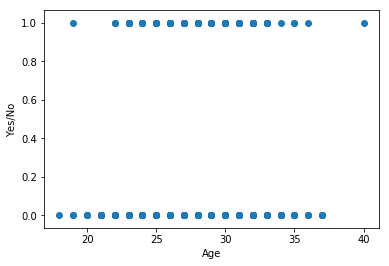

In [5]:
# Plotting the scatter matrix

plt.scatter(df.Age, df.YesNo)
plt.xlabel('Age')
plt.ylabel('Yes/No')
plt.show()

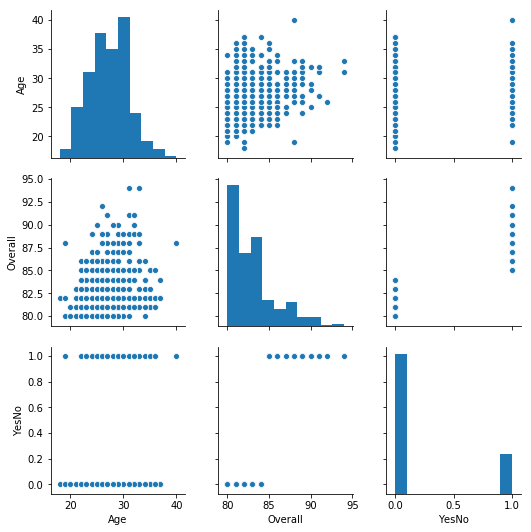

In [6]:
# Plotting the pairplot using seaborn

sb.pairplot(df)

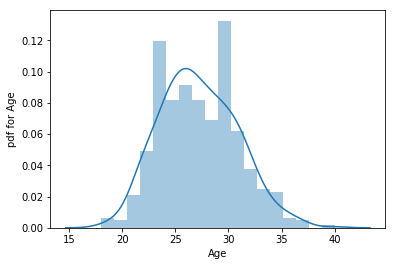

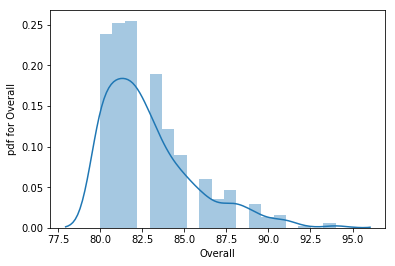

In [7]:
# Plotting probability distribution plot for parameters

sb.distplot(df[['Age']])
plt.xlabel('Age')
plt.ylabel('pdf for Age')
plt.show()

sb.distplot(df.Overall)
plt.xlabel('Overall')
plt.ylabel('pdf for Overall')
plt.show()

In [8]:
# Splitting the sliced data into training and testing sets

from sklearn.model_selection import train_test_split as tts
Age_train, Age_test, YesNo_train, YesNo_test = tts(df[['Age']], df.YesNo, train_size = 0.8, test_size = 0.2)

In [9]:
# Importing library to perform logistic regression

from sklearn.linear_model import LogisticRegression as logreg
model = logreg()

In [10]:
# Performing logistic regression

model.fit(Age_train, YesNo_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# Performing prediction on test dataset

model.predict(Age_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# Determining accuracy of model

model.score(Age_test, YesNo_test)

0.81